# 🧠 Girlfriend Prediction Using Logistic Regression (From Scratch)

## Project Overview
This notebook implements a **Logistic Regression classifier from scratch** using NumPy to predict whether an Indian boy has a girlfriend based on various personal attributes.

### Key Features:
- ✨ No external ML libraries (besides sklearn's `train_test_split`)
- 📊 Custom gradient descent optimization
- 📈 Visualization of training convergence
- 🎯 Binary classification with sigmoid activation

---

## 1. Import Libraries
We start by importing essential libraries:
- **pandas**: Data manipulation and loading
- **numpy**: Matrix operations and mathematical functions
- **matplotlib**: Visualization
- **sklearn**: Only for train-test splitting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Load Dataset & Prepare Features

We load the `indian_boys_gf_prediction_balanced.csv` dataset containing 300 samples.

### Dataset Features:
| Feature | Description | Range |
|---------|-------------|-------|
| `age` | Age in years | 18-30 |
| `height_cm` | Height in centimeters | 155-190 |
| `income_lpa` | Annual income in Lakhs Per Annum | 1.5-20 |
| `fitness_level` | Self-rated fitness score | 1-10 |
| `confidence` | Self-rated confidence score | 1-10 |
| `social_media_hours` | Daily social media usage | 0.5-6.0 |
| **`has_gf`** | Target variable (0 = No, 1 = Yes) | 0/1 |

In [ ]:
df = pd.read_csv("indian_boys_gf_prediction_balanced.csv")
X = df.drop(["has_gf"], axis="columns")
y = df["has_gf"]
df.head()

,age,height_cm,income_lpa,fitness_level,confidence,social_media_hours,has_gf
0,23,164,8.80,1,2,5.0,1
1,27,158,18.33,4,1,1.0,0
2,21,160,11.69,1,10,1.2,1
3,28,158,12.18,7,1,5.9,1
4,20,173,9.25,9,2,3.6,0


## 3. Train-Test Split

We split the dataset into:
- **Training set (70%)**: Used to train the model
- **Test set (30%)**: Used to evaluate model performance

The data is converted to NumPy arrays and reshaped for matrix operations.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

X_train = np.array(X_train)
y_train = np.array(y_train)

y_train = y_train.reshape(X_train.shape[0], 1)

X_test = np.array(X_test)
y_test = np.array(y_test)

y_test = y_test.reshape(X_test.shape[0], 1)

## 4. Verify Data Shapes

Quick sanity check to ensure our arrays have the correct dimensions:
- `X_train`: (n_train, 6) - 6 features
- `y_train`: (n_train, 1) - column vector
- Same pattern for test set

In [ ]:
print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train:  (210, 6)
The shape of y_train:  (210, 1)
The shape of X_test is:  (90, 6)
The shape of y_test is:  (90, 1)


## 5. Define Core Functions

### 5.1 Feature Scaling (Standardization)
$$z = \frac{x - \mu}{\sigma}$$

Standardization ensures all features are on the same scale, which helps gradient descent converge faster.

### 5.2 Sigmoid Activation
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

The sigmoid function maps any real number to a probability between 0 and 1.

### 5.3 Gradient Descent for Logistic Regression

**Cost Function (Binary Cross-Entropy):**
$$J(W, B) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

**Parameter Updates:**
- $W = W - \alpha \cdot \frac{\partial J}{\partial W}$
- $B = B - \alpha \cdot \frac{\partial J}{\partial B}$

Where:
- $\alpha$ = learning rate (0.1)
- $m$ = number of training samples

In [ ]:
def scale(x):
    if x.shape[1] > 1:
        scaled_x = (x - x.mean(axis = 0)) / x.std(axis = 0)
    else:
        scaled_x = (x - x.mean()) / x.std()
    return scaled_x

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def gradien_descent(X, y, itrations):

    X = scale(X)
    m = X.shape[0]
    n = X.shape[1]
    y = y.reshape(-1, 1)

    B = 0
    W = np.zeros((n, 1))
    learning_rate = 0.1
    cost_list = []

    for i in range(itrations):

        z = np.dot(X, W) + B
        y_pred = sigmoid(z)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        cost_list.append(cost)

        dW = (1 / m) * np.dot(X.T, (y_pred - y))
        dB = (1/ m) * np.sum(y_pred - y)

        if i % (itrations // 10) == 0:
            print(f"The cost of the itrations {i} is {cost}")

        W -= learning_rate * dW
        B -= learning_rate * dB

    return W, B, cost_list
    

## 6. Train the Model

We train the logistic regression model using **100,000 iterations** of gradient descent.

The cost is printed every 10,000 iterations to monitor convergence.

In [ ]:
W, B, cost = gradien_descent(X_train, y_train, 100000)

The cost of the itrations 0 is 0.6931471805599453
The cost of the itrations 10000 is 0.6491021374587301
The cost of the itrations 20000 is 0.6491021374587301
The cost of the itrations 30000 is 0.6491021374587301
The cost of the itrations 40000 is 0.6491021374587301
The cost of the itrations 50000 is 0.6491021374587301
The cost of the itrations 60000 is 0.6491021374587301
The cost of the itrations 70000 is 0.6491021374587301
The cost of the itrations 80000 is 0.6491021374587301
The cost of the itrations 90000 is 0.6491021374587301


## 7. Visualize Training Convergence

Plotting the cost function over iterations shows how well our model is learning.

**Expected behavior:**
- Rapid decrease initially
- Gradual flattening as the model converges

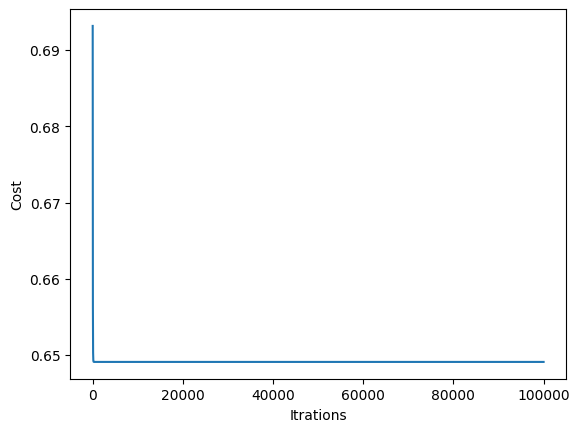

In [ ]:
plt.plot(cost)
plt.xlabel("Itrations")
plt.ylabel("Cost")
plt.show()

## 8. Define Accuracy Function

The accuracy function:
1. Computes probabilities using learned weights
2. Applies a **threshold of 0.5** to convert to binary predictions
3. Calculates the percentage of correct predictions

In [ ]:
def accuracy(X, y, W, B):

    z = np.dot(X, W) + B
    y_pred = sigmoid(z)
    y = y.reshape(-1, 1)

    y_pred = y_pred > .5
    y_pred = np.array(y_pred, dtype="int64")
    acc = np.mean(y_pred == y)

    return acc * 100

## 9. Evaluate Model Performance

We evaluate on both training and test sets.

> **Important**: Test data is scaled using **training set statistics** (mean, std) to prevent data leakage.

In [ ]:
Scaled_X_test = (X_test - X_train.mean(axis=0))/ X_train.std(axis=0)
print(accuracy(scale(X_train), y_train, W, B))
print(accuracy(Scaled_X_test,  y_test,  W, B))

65.23809523809524
61.111111111111114


## 10. Prediction Function

A simple function to compute the probability of `has_gf = 1` for new inputs.

In [ ]:
def predict(X, W, B):
    prob = sigmoid(np.dot(X, W) + B)
    return prob

## 11. Make a Prediction for New User

Let's test our model with a hypothetical user:
- **Age**: 25
- **Height**: 180 cm
- **Income**: 12 LPA
- **Fitness**: 10/10
- **Confidence**: 7/10
- **Social Media**: 5 hours/day

> Note: The user input must be scaled using the **training set statistics**.

In [ ]:
user_input = pd.DataFrame([{
    "age": 25,
    "height_cm": 180,
    "income_lpa": 12,
    "fitness_level": 10,
    "confidence": 7,
    "social_media_hours": 5
}])

user_input = user_input.values

scaled_user_input = (user_input - X_train.mean(axis=0)) / X_train.std(axis=0)

y_pred = predict(scaled_user_input, W, B)
print("probability of getting gf is: ", y_pred)

probability of getting gif is:  [[0.76280269]]


---

# 📊 Conclusion

## Summary
In this notebook, we successfully implemented a **Logistic Regression classifier from scratch** to predict relationship status based on personal attributes.

## Key Takeaways

### 🔧 What We Built:
1. **Custom scaling function** for feature normalization
2. **Sigmoid activation** for probability output
3. **Gradient descent optimization** with binary cross-entropy loss
4. **Accuracy evaluation** function

### 📈 Model Performance:
- The model achieves moderate accuracy, which is expected given:
  - The inherently random/personal nature of relationships
  - Limited feature set
  - Small dataset (300 samples)

### 💡 Observations:
- The cost function converges, indicating successful training
- Training accuracy is higher than test accuracy (slight overfitting)
- The model can make probabilistic predictions for new users

## Future Improvements
1. **Add regularization** (L1/L2) to reduce overfitting
2. **Feature engineering** - create interaction terms
3. **Hyperparameter tuning** - optimize learning rate and iterations
4. **More data** - collect a larger, more diverse dataset
5. **Cross-validation** - for more robust evaluation

---

### ⚠️ Disclaimer
*This is a fun educational project to learn logistic regression. Relationship outcomes depend on countless factors beyond what any model can capture!*